In [1]:
import pandas
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/scipy/cluster/vq.py:88: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/usr/local/lib/python2.7/dist-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy


In [2]:
fName = "/home/bharat/Documents/code/sson_pred/data/20190103-22-53-substorms.csv"

In [3]:
smssDF = pandas.read_csv(fName, parse_dates=["Date_UTC"])
# rename the cols
smssDF.columns = [ "datetime", "mlat", "mlt" ]
smssDF.head()

,datetime,mlat,mlt
0,1996-01-01 20:16:00,71.32,22.45
1,1996-01-01 23:36:00,70.23,0.07
2,1996-01-02 00:25:00,69.36,22.92
3,1996-01-02 14:12:00,70.06,23.20
4,1996-01-02 16:09:00,65.81,0.62


In [4]:
# convert to year and month
smssDF['year'] = pandas.DatetimeIndex(smssDF['datetime']).year
smssDF['month'] = pandas.DatetimeIndex(smssDF['datetime']).month
smssDF.head()

,datetime,mlat,mlt,year,month
0,1996-01-01 20:16:00,71.32,22.45,1996,1
1,1996-01-01 23:36:00,70.23,0.07,1996,1
2,1996-01-02 00:25:00,69.36,22.92,1996,1
3,1996-01-02 14:12:00,70.06,23.20,1996,1
4,1996-01-02 16:09:00,65.81,0.62,1996,1


In [5]:
# group by and get total count for each month and year
ssStatDF = smssDF.groupby(["year", "month"]).size().reset_index()
ssStatDF.columns = [ "year", "month", "count" ]
ssStatDF = ssStatDF.pivot("month", "year", "count")
ssStatDF.head()

year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,,,,,,,,,,
1,149,149,122,176,243,116,89,194,345,326,...,171,47,33,86,86,51,83,118,121,203
2,169,164,142,195,235,82,91,241,216,159,...,180,62,40,76,124,78,115,123,130,159
3,196,138,191,191,98,209,109,323,225,174,...,229,80,62,112,223,126,43,193,151,278
4,160,151,120,140,145,200,173,295,141,152,...,167,40,124,96,122,38,79,111,99,208
5,73,107,211,99,157,119,101,339,103,197,...,91,26,110,105,80,123,54,72,143,93


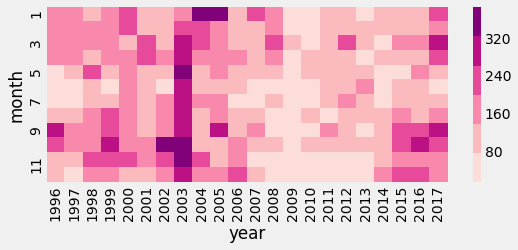

In [6]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(8,3))
ax = sns.heatmap(ssStatDF, cmap=sns.color_palette("RdPu"))#YlGnBu#
fig.savefig("../plots/supermag_ss_heatmap_yrmon.png")

In [10]:
# group by and get total count for each month and year
smssDF['day'] = pandas.DatetimeIndex(smssDF['datetime']).day
smssDF['month'] = pandas.DatetimeIndex(smssDF['datetime']).month
ssStatDF = smssDF.groupby(["month", "day"]).size().reset_index()
ssStatDF.columns = [ "month", "day", "count" ]
ssStatDF = ssStatDF.pivot( "month", "day","count")
ssStatDF.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,102.0,106.0,109.0,125.0,104.0,112.0,141.0,91.0,69.0,96.0,...,131.0,107.0,93.0,99.0,108.0,80.0,105.0,110.0,108.0,110.0
2,84.0,127.0,115.0,95.0,81.0,119.0,90.0,115.0,93.0,114.0,...,69.0,91.0,99.0,73.0,71.0,128.0,134.0,39.0,NaN,NaN
3,176.0,129.0,119.0,110.0,92.0,114.0,145.0,109.0,114.0,154.0,...,100.0,95.0,82.0,72.0,105.0,138.0,152.0,121.0,117.0,128.0
4,93.0,104.0,89.0,125.0,139.0,126.0,91.0,74.0,100.0,84.0,...,103.0,121.0,117.0,90.0,59.0,60.0,83.0,71.0,103.0,NaN
5,120.0,125.0,101.0,67.0,59.0,77.0,91.0,130.0,90.0,68.0,...,65.0,85.0,81.0,79.0,50.0,86.0,117.0,105.0,112.0,65.0


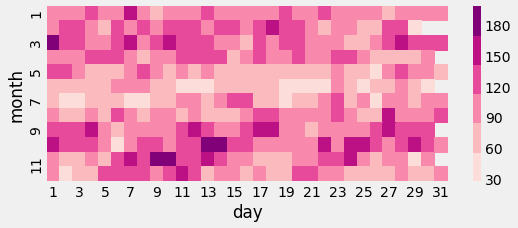

In [11]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(8,3))
ax = sns.heatmap(ssStatDF, cmap=sns.color_palette("RdPu"))#YlGnBu#
fig.savefig("../plots/supermag_ss_heatmap_monday.png")

In [12]:
# group by and get total count for each month and year
smssDF['day'] = pandas.DatetimeIndex(smssDF['datetime']).day
smssDF['hour'] = pandas.DatetimeIndex(smssDF['datetime']).hour
ssStatDF = smssDF.groupby(["hour", "day"]).size().reset_index()
ssStatDF.columns = [ "hour", "day", "count" ]
ssStatDF = ssStatDF.pivot( "hour", "day","count")
ssStatDF.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
hour,,,,,,,,,,,,,,,,,,,,,
0,46,54,40,51,47,31,44,49,50,40,...,36,30,45,33,30,47,39,31,29,27
1,50,39,31,40,33,31,52,47,43,43,...,37,64,33,55,37,47,42,41,47,19
2,37,39,40,41,27,43,41,39,39,45,...,44,39,35,38,32,36,44,37,33,29
3,48,43,50,47,39,44,41,50,41,35,...,38,44,45,33,30,41,49,35,37,14
4,47,55,41,41,42,44,49,49,53,43,...,40,52,46,49,26,40,59,41,39,22


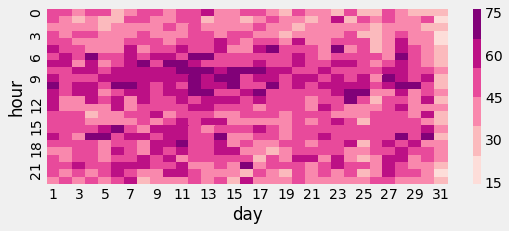

In [13]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(8,3))
ax = sns.heatmap(ssStatDF, cmap=sns.color_palette("RdPu"))#YlGnBu#
fig.savefig("../plots/supermag_ss_heatmap_dayhour.png")

In [8]:
# colNames = ["date", "0_30", "label", "pred_label"]
# predFname = "/home/bharat/Documents/data/ss_onset_dataset/data/all_data.nBins_1.binTimeRes_30.onsetFillTimeRes_1.onsetDelTCutoff_2.omnHistory_120.omnDBRes_1.shuffleData_True.csv"
# predDF = pandas.read_csv(predFname, names=colNames, header=0, parse_dates=["date"])
# predDF.head()